In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('polynomial_train.csv')


In [3]:
features = pd.DataFrame(data)
features = features.drop(['label'], axis = 1)
features = features.drop(['Unnamed: 0'], axis = 1)
y = data.label
y = pd.DataFrame(y)

In [5]:
#feature engineering

a = 3
for i in range(3):
    for j in range(3):
        if j >= i:
            
            features.loc[:,a] = features.iloc[:,j]*features.iloc[:,i]
            a = a + 1
            
            
for k in range(3):
    for l in range(3):
        for m in range(3):
            if l >= k and m >= l:
                features.loc[:,a] = features.iloc[:,k]*features.iloc[:,l]*features.iloc[:,m]
                a = a + 1
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                if j >= i and k >= j and l >= k:
                    features.loc[:,a] = features.iloc[:,i]*features.iloc[:,j]*features.iloc[:,k]*features.iloc[:,l] 
                    a = a + 1
                            

In [6]:
#feature scaling

for i in features.columns:   
    features[i] = ((features[i]-features[i].mean())/(features[i].std()))


In [12]:

n_features = features.shape[1]
n_samples = features.shape[0]

weight = np.zeros((n_features, 1))
#weight = np.random.randn(n_features, 1)
#print(weight)
bias = 0
lr = .25
cost = []

for i in range(170):
    y_pred = np.dot(features, weight) + float(bias)
    error = y_pred - y
    dm = lr*((np.dot(features.T, error))/(features.shape[0]))
    db =  lr*(np.mean(error))
    weight = weight - dm
    bias = bias - db
    cost.append((np.mean(abs(error**2)))/2)

In [13]:
cost

[label    3.337944e+12
 dtype: float64,
 label    2.040392e+12
 dtype: float64,
 label    1.441117e+12
 dtype: float64,
 label    1.091128e+12
 dtype: float64,
 label    8.762651e+11
 dtype: float64,
 label    7.407310e+11
 dtype: float64,
 label    6.528206e+11
 dtype: float64,
 label    5.940032e+11
 dtype: float64,
 label    5.533102e+11
 dtype: float64,
 label    5.241673e+11
 dtype: float64,
 label    5.025773e+11
 dtype: float64,
 label    4.860681e+11
 dtype: float64,
 label    4.730797e+11
 dtype: float64,
 label    4.626052e+11
 dtype: float64,
 label    4.539779e+11
 dtype: float64,
 label    4.467438e+11
 dtype: float64,
 label    4.405855e+11
 dtype: float64,
 label    4.352744e+11
 dtype: float64,
 label    4.306418e+11
 dtype: float64,
 label    4.265603e+11
 dtype: float64,
 label    4.229315e+11
 dtype: float64,
 label    4.196782e+11
 dtype: float64,
 label    4.167391e+11
 dtype: float64,
 label    4.140648e+11
 dtype: float64,
 label    4.116153e+11
 dtype: float64,


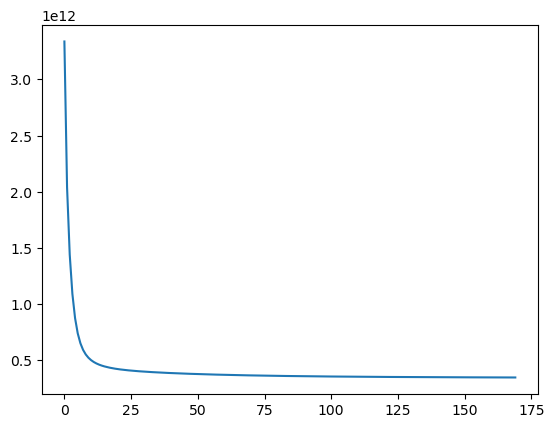

In [14]:
plt.plot(cost)

In [10]:
features.A


0       -0.413844
1       -0.805070
2        0.929756
3       -0.597912
4        1.791314
           ...   
49995   -0.163859
49996    0.268782
49997   -0.210270
49998    0.611755
49999   -0.325462
Name: A, Length: 50000, dtype: float64